## 评估子任务的成功率

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# 导入 cabinet 数据

In [2]:
resource_dir = os.path.join(os.getcwd(), 'resources/cabinet_data')
lock_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HDTO_LockedCabinet-v1_unlock.csv')
door_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HDTO_LockedCabinet-v1_door.csv')
lock_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_TD3_Cabinet-v1_door.csv')
door_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_TD3_Cabinet-v1_unlock.csv')
lock_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HER_LockedCabinet-v1_unlock.csv')
door_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HER_LockedCabinet-v1_door.csv')

lock_sac_success_rate = lock_sac_success_rate_frame['Value']
door_sac_success_rate = door_sac_success_rate_frame['Value']
timesteps_sac = 1e-5 * lock_sac_success_rate_frame['Step']

lock_td3_success_rate = lock_td3_success_rate_frame['Value']
door_td3_success_rate = door_td3_success_rate_frame['Value']
timesteps_td3 = 1e-5 * lock_td3_success_rate_frame['Step']

lock_her_success_rate = lock_her_success_rate_frame['Value']
door_her_success_rate = door_her_success_rate_frame['Value']
timesteps_her = 1e-5 * lock_her_success_rate_frame['Step']

lock_sac_mean = lock_sac_success_rate.rolling(30, min_periods=1).mean()
lock_sac_std = lock_sac_success_rate.rolling(30, min_periods=1).std()

lock_td3_mean = lock_td3_success_rate.rolling(30, min_periods=1).mean()
lock_td3_std = lock_td3_success_rate.rolling(30, min_periods=1).std()

lock_her_mean = lock_her_success_rate.rolling(30, min_periods=1).mean()
lock_her_std = lock_her_success_rate.rolling(30, min_periods=1).std()

door_sac_mean = door_sac_success_rate.rolling(30, min_periods=1).mean()
door_sac_std = door_sac_success_rate.rolling(30, min_periods=1).std()

door_td3_mean = door_td3_success_rate.rolling(30, min_periods=1).mean()
door_td3_std = door_td3_success_rate.rolling(30, min_periods=1).std()

door_her_mean = door_her_success_rate.rolling(30, min_periods=1).mean()
door_her_std = door_her_success_rate.rolling(30, min_periods=1).std()

# 导入 drawerbox 数据

In [3]:
resource_dir = os.path.join(os.getcwd(), 'resources/drawer_data')
drawer_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HDTO_DrawerBox-v1_drawer.csv')
drawer_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IMPTD3_DrawerBox-v1_num_3_seed_10_1.csv')
drawer_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_her_DrawerBox-v1_num_4_seed_10.csv')
place_sac_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_HDTO_DrawerBox-v1_cube.csv')
place_td3_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_IMPTD3_DrawerBox-v1_num_3_seed_10_1_1.csv')
place_her_success_rate_frame = pd.read_csv(resource_dir + '/log_runs_her_DrawerBox-v1_num_4_seed_10_1.csv')

drawer_sac_success_rate = drawer_sac_success_rate_frame['Value']
place_sac_success_rate = place_sac_success_rate_frame['Value']
timesteps_sac_drawer = 1e-5 * drawer_sac_success_rate_frame['Step']

drawer_td3_success_rate = drawer_td3_success_rate_frame['Value']
place_td3_success_rate = place_td3_success_rate_frame['Value']
timesteps_td3_drawer = 1e-5 * drawer_td3_success_rate_frame['Step']

drawer_her_success_rate = drawer_her_success_rate_frame['Value']
place_her_success_rate = place_her_success_rate_frame['Value']
timesteps_her_drawer = 1e-5 * drawer_her_success_rate_frame['Step']

drawer_sac_mean = drawer_sac_success_rate.rolling(30, min_periods=1).mean()
drawer_sac_std = drawer_sac_success_rate.rolling(30, min_periods=1).std()

drawer_td3_mean = drawer_td3_success_rate.rolling(30, min_periods=1).mean()
drawer_td3_std = drawer_td3_success_rate.rolling(30, min_periods=1).std()

drawer_her_mean = drawer_her_success_rate.rolling(30, min_periods=1).mean()
drawer_her_std = drawer_her_success_rate.rolling(30, min_periods=1).std()

place_sac_mean = place_sac_success_rate.rolling(30, min_periods=1).mean()
place_sac_std = place_sac_success_rate.rolling(30, min_periods=1).std()

place_td3_mean = place_td3_success_rate.rolling(30, min_periods=1).mean()
place_td3_std = place_td3_success_rate.rolling(30, min_periods=1).std()

place_her_mean = place_her_success_rate.rolling(30, min_periods=1).mean()
place_her_std = place_her_success_rate.rolling(30, min_periods=1).std()

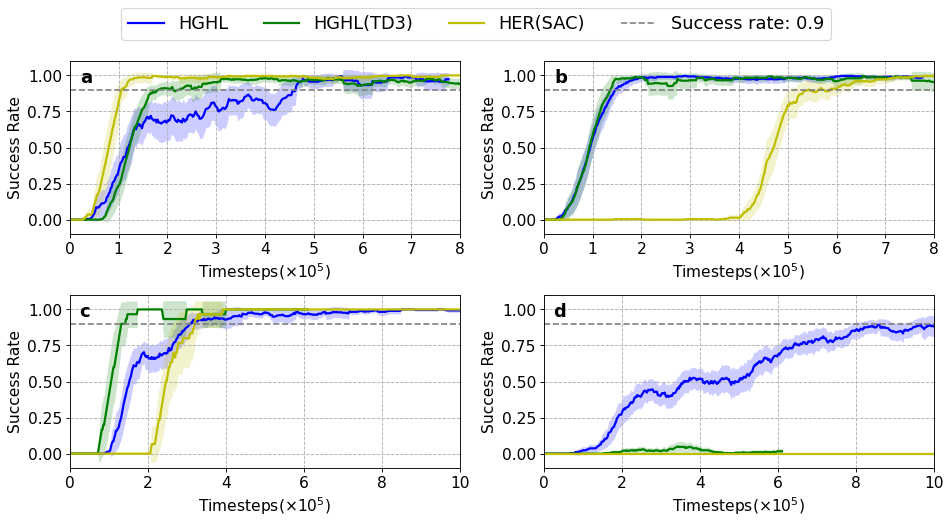

In [8]:
# 创建一个包含两个子图的图形
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 6), dpi=80)

# 第一个子图
ax1.plot(timesteps_sac, lock_sac_mean, 'b', linewidth=2.0, label='HGHL')
ax1.fill_between(timesteps_sac, lock_sac_mean - 0.5 * lock_sac_std, lock_sac_mean + 0.5 * lock_sac_std,color='b', alpha=0.2, linewidth=0)
ax1.plot(timesteps_td3, lock_td3_mean, 'g', linewidth=2.0, label='HGHL(TD3)')
ax1.fill_between(timesteps_td3, lock_td3_mean - 0.5 * lock_td3_std, lock_td3_mean + 0.5 * lock_td3_std,color='g', alpha=0.2, linewidth=0)
ax1.plot(timesteps_her, lock_her_mean, 'y', linewidth=2.0, label='HER(SAC)')
ax1.fill_between(timesteps_her, lock_her_mean - 0.5 * lock_her_std, lock_her_mean + 0.5 * lock_her_std,color='y', alpha=0.2, linewidth=0)

ax1.set_xlim(0, 8)
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlabel('Timesteps($\\times 10^5$)', fontsize=14)
ax1.set_ylabel('Success Rate', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.grid(linestyle='--')
ax1.text(0.1, 0.95, ' a', fontsize=16, color='black', fontweight='bold')
ax1.axhline(y=0.9, color='gray', linestyle='--', label='Success rate: 0.9')

# 第二个子图
ax2.plot(timesteps_sac, door_sac_mean, 'b', linewidth=2.0, label='HGHL')
ax2.fill_between(timesteps_sac, door_sac_mean - 0.5 * door_sac_std, door_sac_mean + 0.5 * door_sac_std, color='b', alpha=0.2, linewidth=0)
ax2.plot(timesteps_td3, door_td3_mean, 'g', linewidth=2.0, label='HGHL(TD3)')
ax2.fill_between(timesteps_td3, door_td3_mean - 0.5 * door_td3_std, door_td3_mean + 0.5 * door_td3_std,color='g', alpha=0.2, linewidth=0)
ax2.plot(timesteps_her, door_her_mean, 'y', linewidth=2.0, label='HER(SAC)')
ax2.fill_between(timesteps_her, door_her_mean - 0.5 * door_her_std, door_her_mean + 0.5 * door_her_std,color='y', alpha=0.2, linewidth=0)

ax2.set_xlim(0, 8)
ax2.set_ylim(-0.1, 1.1)
ax2.set_xlabel('Timesteps($\\times 10^5$)', fontsize=14)
ax2.set_ylabel('Success Rate', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.grid(linestyle='--')
ax2.text(0.1, 0.95, ' b', fontsize=16, color='black', fontweight='bold')
ax2.axhline(y=0.9, color='gray', linestyle='--', label='Success rate: 0.9')

# 第三个子图
ax3.plot(timesteps_sac_drawer, drawer_sac_mean, 'b', linewidth=2.0, label='HGHL')
ax3.fill_between(timesteps_sac_drawer, drawer_sac_mean - 0.5 * drawer_sac_std, drawer_sac_mean + 0.5 * drawer_sac_std,color='b', alpha=0.2, linewidth=0)
ax3.plot(timesteps_td3_drawer, drawer_td3_mean, 'g', linewidth=2.0, label='HGHL(TD3)')
ax3.fill_between(timesteps_td3_drawer, drawer_td3_mean - 0.5 * drawer_td3_std, drawer_td3_mean + 0.5 * drawer_td3_std,color='g', alpha=0.2, linewidth=0)
ax3.plot(timesteps_her_drawer, drawer_her_mean, 'y', linewidth=2.0, label='HER(SAC)')
ax3.fill_between(timesteps_her_drawer, drawer_her_mean - 0.5 * drawer_her_std, drawer_her_mean + 0.5 * drawer_her_std,color='y', alpha=0.2, linewidth=0)

ax3.set_xlim(0, 10)
ax3.set_ylim(-0.1, 1.1)
ax3.set_xlabel('Timesteps($\\times 10^5$)', fontsize=14)
ax3.set_ylabel('Success Rate', fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)
ax3.grid(linestyle='--')
ax3.text(0.1, 0.95, ' c', fontsize=16, color='black', fontweight='bold')
ax3.axhline(y=0.9, color='gray', linestyle='--', label='Success rate: 0.9')

# 第四个子图
ax4.plot(timesteps_sac_drawer, place_sac_mean, 'b', linewidth=2.0, label='HGHL')
ax4.fill_between(timesteps_sac_drawer, place_sac_mean - 0.5 * place_sac_std, place_sac_mean + 0.5 * place_sac_std, color='b', alpha=0.2, linewidth=0)
ax4.plot(timesteps_td3_drawer, place_td3_mean, 'g', linewidth=2.0, label='HGHL(TD3)')
ax4.fill_between(timesteps_td3_drawer, place_td3_mean - 0.5 * place_td3_std, place_td3_mean + 0.5 * place_td3_std,color='g', alpha=0.2, linewidth=0)
ax4.plot(timesteps_her_drawer, place_her_mean, 'y', linewidth=2.0, label='HER(SAC)')
ax4.fill_between(timesteps_her_drawer, place_her_mean - 0.5 * place_her_std, place_her_mean + 0.5 * place_her_std,color='y', alpha=0.2, linewidth=0)

ax4.set_xlim(0, 10)
ax4.set_ylim(-0.1, 1.1)
ax4.set_xlabel('Timesteps($\\times 10^5$)', fontsize=14)
ax4.set_ylabel('Success Rate', fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=14)
ax4.grid(linestyle='--')
ax4.text(0.1, 0.95, ' d', fontsize=16, color='black', fontweight='bold')
ax4.axhline(y=0.9, color='gray', linestyle='--', label='Success rate: 0.9')

# 创建共享的图例
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 1), ncol=5, fontsize=16)

# 调整子图之间的间距
plt.tight_layout()

# 保存图形
plt.savefig('resources/images/combined_plot.png', bbox_inches='tight')

# 显示图形
plt.show()